# Crank-Slider Mechanism Position, Velocity, and Accleration Vector Solver
    Written By: Matt Ryan Liqua
    Written: 3/13/25
    Last Updated: 3/14/25
    Repo: https://github.com/MLiqua/FourBarPostion

In [25]:
# Inputs
# ';' At end supresses output
# TO DO: Make it all in standard SI units (m)
println("This calculation assumes ground is d [R1] \n")
print("Input a [R2] length: ") 
a = parse(Float64, readline())

print("Input b [R3] length: ") 
b = parse(Float64, readline())

print("Input c [R4] length: ") 
c = parse(Float64, readline())

print("Input Theta2 (degree): ") 
Theta2 = parse(Float64, readline())
RadTheta2 = deg2rad(Theta2)

print("Input Omega2 (rad/s): ") 
Omega2 = parse(Float64, readline())

print("Input Alpha2 (rad/s^2): ") 
Alpha2 = parse(Float64, readline())

#This was an inital assumption
RadTheta4 = deg2rad(90)
;

This calculation assumes ground is d [R1] 

Input a [R2] length: stdin> 45
Input b [R3] length: stdin> 130
Input c [R4] length: stdin> 20
Input Theta2 (degree): stdin> 30
Input Omega2 (rad/s): stdin> 10
Input Alpha2 (rad/s^2): stdin> -5


In [26]:
# Theta3_1, Theta3_2, d_1, and d_2
# Note that asin is a multi valued function (+ pi)
FracTop = a*sin(RadTheta2) - c
FracBot = b
RadTheta3_1 = asin(FracTop / FracBot)
DegTheta3_1 = rad2deg(RadTheta3_1)

FracTop = a*sin(RadTheta2) - c
FracBot = b
RadTheta3_2 = asin(- FracTop / FracBot) + pi
DegTheta3_2 = rad2deg(RadTheta3_2)

d_1 = a*cos(RadTheta2) - b*cos(RadTheta3_1)
d_2 = a*cos(RadTheta2) - b*cos(RadTheta3_2)
;

In [27]:
# Calculating Omega3_1, Omega3_2, Ddot_1, and Ddot_2
# Ddot is considered the Vb_Vel_Vector

FracTop = a*Omega2*cos(RadTheta2)
FracBot = b*cos(RadTheta3_1)
Omega3_1 = FracTop / FracBot

FracTop = a*Omega2*cos(RadTheta2)
FracBot = b*cos(RadTheta3_2)
Omega3_2 = FracTop / FracBot

Ddot_1 = -a*Omega2*sin(RadTheta2) + b*Omega3_1*sin(RadTheta3_1)
Ddot_2 = -a*Omega2*sin(RadTheta2) + b*Omega3_2*sin(RadTheta3_2)
;

In [28]:
# Calc Alpha3_1, Alpha3_2, DdotDot_1, and DdotDot_2
# DdotDot_1 = Ab_Acel_Vector

FracTop = a*Alpha2*cos(RadTheta2) - a*Omega2^2*sin(RadTheta2) + b*Omega3_1^2*sin(RadTheta3_1)
FracBot = b*cos(RadTheta3_1)
Alpha3_1 = FracTop / FracBot

FracTop = a*Alpha2*cos(RadTheta2) - a*Omega2^2*sin(RadTheta2) + b*Omega3_2^2*sin(RadTheta3_2)
FracBot = b*cos(RadTheta3_2)
Alpha3_2 = FracTop / FracBot

DdotDot_1 = -a*Alpha2*sin(RadTheta2) - a*Omega2^2*cos(RadTheta2) + b*Alpha3_1*sin(RadTheta3_1) + b*Omega3_1^2*cos(RadTheta3_1)
DdotDot_2 = -a*Alpha2*sin(RadTheta2) - a*Omega2^2*cos(RadTheta2) + b*Alpha3_2*sin(RadTheta3_2) + b*Omega3_2^2*cos(RadTheta3_2)
;

In [29]:
function DegSolve(xr,yi)
        if (xr > 0) && (yi > 0)
            Rad = atan(yi / xr)
            Deg = rad2deg(Rad)
            return(Deg)
        elseif (xr > 0) && (yi < 0)
            Rad = atan(yi / xr)
            Deg = rad2deg(Rad)
            return(Deg)
        elseif (xr < 0) && (yi > 0)
            Rad = atan(yi / xr) + pi
            Deg = rad2deg(Rad)
            return(Deg)
        else
            Rad = atan(yi / xr) + pi
            Deg = rad2deg(Rad)
            return(Deg)
        end
end
;

In [30]:
function VbDeg(x)
    if x > 0
        Deg = 0
        return Deg
    else
        Deg = 180
        return Deg
    end
end
;

In [31]:
# Calc Va_Vel_Vector
# Note: Vb_Vel_Vector = Ddot
using LinearAlgebra

Va_Vel_R = -a*Omega2*sin(RadTheta2)
Va_Vel_I = a*Omega2*cos(RadTheta2)
Va_Vect = Va_Vel_R + Va_Vel_I*im # 'im' means imaginary
Va_Mag =  norm(Va_Vect)
Va_Deg = DegSolve(Va_Vel_R,Va_Vel_I)
;

In [32]:
# Calc Vba_Vel_Vector
Vba_Vel_R_1 = -b*Omega3_1*sin(RadTheta3_1)
Vba_Vel_I_1 = b*Omega3_1*cos(RadTheta3_1)

Vba_Vel_R_2 = -b*Omega3_2*sin(RadTheta3_2)
Vba_Vel_I_2 = b*Omega3_2*cos(RadTheta3_2)

Vba_Vect_1 = Vba_Vel_R_1 + Vba_Vel_I_1*im
Vba_Mag_1 =  norm(Vba_Vect_1)
Vba_Deg_1 = DegSolve(Vba_Vel_R_1,Vba_Vel_I_1)

Vba_Vect_2 = Vba_Vel_R_2 + Vba_Vel_I_2*im
Vba_Mag_2 =  norm(Vba_Vect_2)
Vba_Deg_2 = DegSolve(Vba_Vel_R_2,Vba_Vel_I_2)
;

In [33]:
# Calc Va_Acel_Vector
Va_Acel_R = -a*Alpha2*sin(RadTheta2) - a*Omega2^2*cos(RadTheta2)
Va_Acel_I = a*Alpha2*cos(RadTheta2) - a*Omega2^2*sin(RadTheta2)

Va_Acel_Vect = Va_Acel_R + Va_Acel_I*im
Va_Acel_Mag =  norm(Va_Acel_Vect)
Va_Acel_Deg = DegSolve(Va_Acel_R,Va_Acel_I)
;

In [34]:
# Calc Vba_Acel_Vector
# Note: Vb_Acel_Vector = DdotDot
Vba_Acel_R_1 = -b*Alpha3_1*sin(RadTheta3_1) - b*Omega3_1^2*cos(RadTheta3_1)
Vba_Acel_I_1 = b*Alpha3_1*cos(RadTheta3_1) - b*Omega3_1^2*sin(RadTheta3_1)

Vba_Acel_R_2 = -b*Alpha3_2*sin(RadTheta3_2) - b*Omega3_2^2*cos(RadTheta3_2)
Vba_Acel_I_2 = b*Alpha3_2*cos(RadTheta3_2) - b*Omega3_2^2*sin(RadTheta3_2)

Vba_Acel_Vect_1 = Vba_Acel_R_1 + Vba_Acel_I_1*im
Vba_Acel_Mag_1 =  norm(Vba_Acel_Vect_1)
Vba_Acel_Deg_1 = DegSolve(Vba_Acel_R_1,Vba_Acel_I_1)

Vba_Acel_Vect_2 = Vba_Acel_R_2 + Vba_Acel_I_2*im
Vba_Acel_Mag_2 =  norm(Vba_Acel_Vect_2)
Vba_Acel_Deg_2 = DegSolve(Vba_Acel_R_2,Vba_Acel_I_2)
;

In [35]:
#Outputs
# Why are some answer on the review and others not??
using Base
printstyled("These are the final values: \n", bold = true)
printstyled("Circuit One","\t\tCircuit Two\n", underline =true)
println("Theta3_1: ", round(DegTheta3_1, digits =2), "\t\tTheta3_2: ", round(DegTheta3_2, digits = 2))
println("Omega3_1: ", round(Omega3_1, digits =2), "\t\tOmega3_2: ", round(Omega3_2, digits = 2))
println("Alpha3_1: ", round(Alpha3_1, digits =2), "\tAlpha3_2: ", round(Alpha3_2, digits = 2))
println("d_1: ", round(d_1, digits =2), "\t\td_2: ", round(d_2, digits = 2))
println("Ddot_1: ", round(Ddot_1, digits =2), "\t\tDdot_2: ", round(Ddot_2, digits = 2))
println("DdotDot_1: ", round(DdotDot_1, digits =2), "\tDdotDot_2: ", round(DdotDot_2, digits = 2))
print("\n")

printstyled("These are the velocity vector values: \n", bold = true)
println("Va_Vect: ", round(Va_Vect, digits =2), "\n Va_Mag: ", round(Va_Mag, digits = 2), "\n Va_Deg (global): ", round(Va_Deg, digits = 2), "\n")
# why is Vba no included?
println("Vba_Vect_1: ", round(Vba_Vect_1, digits =2), "\n Vba_Mag_1: ", round(Vba_Mag_1, digits = 2), "\n Vba_Deg_1: ", round(Vba_Deg_1, digits = 2), "\n")
println("Vba_Vect_2: ", round(Vba_Vect_2, digits =2), "\n Vba_Mag_2: ", round(Vba_Mag_2, digits = 2), "\n Vba_Deg_2: ", round(Vba_Deg_2, digits = 2), "\n")
println("Vb_Vect_1: ", round(Ddot_1, digits =2), "\t Vb_Vect_2: ", round(Ddot_2, digits = 2))
println("Vb_Angle (Global): ", VbDeg(Ddot_1) , "\t Vb_Angle (Global): ", VbDeg(Ddot_2), "\n")

printstyled("These are the acceleration vector values: \n" , bold = true)
println("Va_Acel_Vect: ", round(Va_Acel_Vect, digits =2), "\n Va_Acel_Mag: ", round(Va_Acel_Mag, digits = 2), "\n Va_Acel_Deg (with global): ", round(Va_Acel_Deg, digits = 2), "\n")
println("Vba_Acel_Vect_1: ", round(Vba_Acel_Vect_1, digits =2), "\n Vba_Acel_Mag_1: ", round(Vba_Acel_Mag_1, digits = 2), "\n Vba_Acel_Deg_1: ", round(Vba_Acel_Deg_1, digits = 2), "\n")
println("Vba_Acel_Vect_2: ", round(Vba_Acel_Vect_2, digits =2), "\n Vba_Acel_Mag_2: ", round(Vba_Acel_Mag_2, digits = 2), "\n Vba_Acel_Deg_2: ", round(Vba_Acel_Deg_2, digits = 2), "\n")
println("Vb_Acel_Vect_1: ", round(DdotDot_1, digits =2), "      Vb_Vect_2: ", round(DdotDot_2, digits = 2))
# How to determine acceleration degree?
#println("Vb_Acel_Angle (Global): ", VbDeg(DdotDot_1) , "   Vb_Angle (Global): ", VbDeg(Ddot_2), "\n")

These are the final values: 
Circuit One		Circuit Two
Theta3_1: 1.1		Theta3_2: 178.9
Omega3_1: 3.0		Omega3_2: -3.0
Alpha3_1: -18.64	Alpha3_2: 18.64
d_1: -91.0		d_2: 168.95
Ddot_1: -217.5		Ddot_2: -232.5
DdotDot_1: -2662.72	DdotDot_2: -4906.51

These are the velocity vector values: 
Va_Vect: -225.0 + 389.71im
 Va_Mag: 450.0
 Va_Deg (global): 120.0

Vba_Vect_1: -7.5 + 389.71im
 Vba_Mag_1: 389.78
 Vba_Deg_1: 91.1

Vba_Vect_2: 7.5 + 389.71im
 Vba_Mag_2: 389.78
 Vba_Deg_2: 88.9

Vb_Vect_1: -217.5	 Vb_Vect_2: -232.5
Vb_Angle (Global): 180	 Vb_Angle (Global): 180

These are the acceleration vector values: 
Va_Acel_Vect: -3784.61 - 2444.86im
 Va_Acel_Mag: 4505.62
 Va_Acel_Deg (with global): 212.86

Vba_Acel_Vect_1: -1121.89 - 2444.86im
 Vba_Acel_Mag_1: 2689.97
 Vba_Acel_Deg_1: 245.35

Vba_Acel_Vect_2: 1121.89 - 2444.86im
 Vba_Acel_Mag_2: 2689.97
 Vba_Acel_Deg_2: -65.35

Vb_Acel_Vect_1: -2662.72      Vb_Vect_2: -4906.51


In [36]:
# Calculations Of Postion Vectors
# x = rcos(theta)
# y = rsin(theta)
# For this we have unknown Theat 3 and d (d is the end point of the vector)

R2_x = a * cos(RadTheta2)
R2_y = a * sin(RadTheta2)

R3_x_1 = b * cos(RadTheta3_1)
R3_y_1 = b * sin(RadTheta3_1)

R3_x_2 = b * cos(RadTheta3_2)
R3_y_2 = b * sin(RadTheta3_2)

R4_x_1 = c * cos(RadTheta4)
R4_y_1 = c * sin(RadTheta4)

;

In [16]:
#Adding needed Packages
using Pkg
#Pkg.agg("Interact")
Pkg.add("WebIO")
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


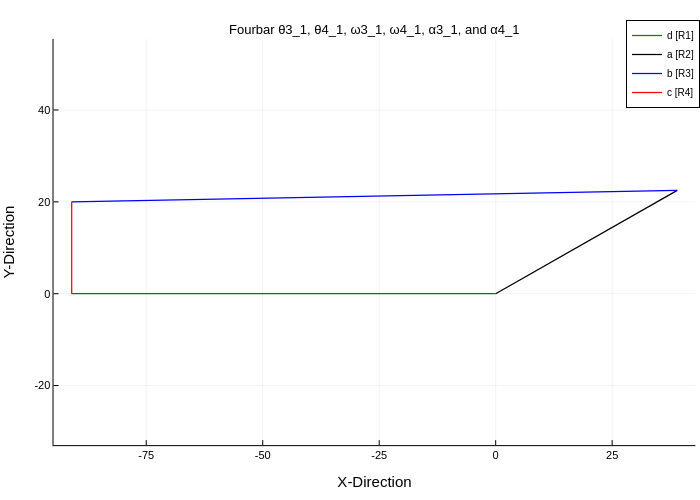

In [65]:
#Graphing first circuit
using Plots

plotlyjs()
Plots.plot( [0, d_1], [0, 0], arrow = true, label = "d [R1]", color = "green", linewidth =1.25,
    thickness_scaling = 1.15,
    autosize = true,
    xlabel = "X-Direction", 
    ylabel = "Y-Direction", 
    title = "Fourbar θ3_1, θ4_1, ω3_1, ω4_1, α3_1, and α4_1",
    titlefontsize=9,
    aspect_ratio = :equal,
    legendfontsize=7,
    legend=:topright
)
Plots.plot!([0, R2_x], [0, R2_y], arrow = true, label = "a [R2]", color = "black", linewidth =1.25)
Plots.plot!([d_1, R2_x], [R4_y_1, R2_y], arrow = true, label = "b [R3]", color = "blue", linewidth =1.25)
Plots.plot!([d_1,d_1], [0,R4_y_1], arrow = true, label = "c [R4]", color = "red", linewidth =1.25)

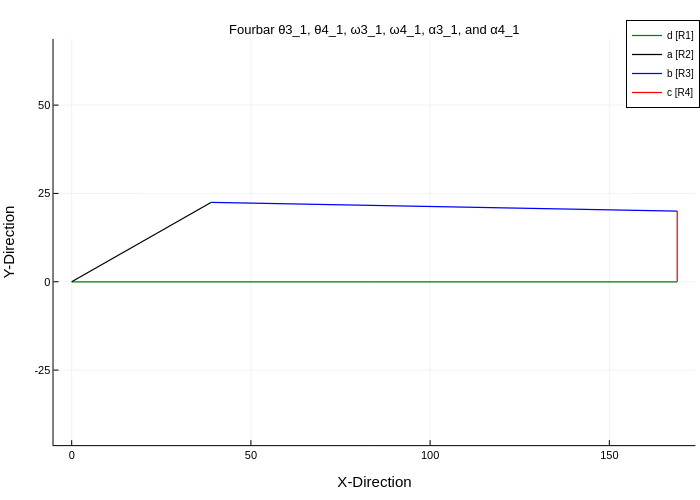

In [64]:
using Plots
# BE VERY CAREFUL WITH HOW VECTORS ARE DEFINED

plotlyjs()
Plots.plot( [0, d_2], [0, 0], arrow = true, label = "d [R1]", color = "green", linewidth =1.25,
    thickness_scaling = 1.15,
    autosize = true,
    xlabel = "X-Direction", 
    ylabel = "Y-Direction", 
    title = "Fourbar θ3_1, θ4_1, ω3_1, ω4_1, α3_1, and α4_1",
    titlefontsize=9,
    aspect_ratio = :equal,
    legendfontsize=7,
    legend=:topright
)
Plots.plot!([0, R2_x], [0, R2_y], arrow = true, label = "a [R2]", color = "black", linewidth =1.25)
Plots.plot!([d_2, R2_x], [R4_y_1, R2_y], arrow = true, label = "b [R3]", color = "blue", linewidth =1.25)
Plots.plot!([d_2,d_2], [0,R4_y_1], arrow = true, label = "c [R4]", color = "red", linewidth =1.25)